<a href="https://colab.research.google.com/github/noahmhan/identifying-two-digit-MNIST-numbers/blob/main/Multi_DigitMNIST_Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
import random
import matplotlib.pyplot as plt
import copy
import numpy as np
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


In [ ]:
def random2DigitMNIST():
  (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

  nX_train = np.array([])
  nY_train = np.array([])
  for i in range(6000):
    r1 = random.randint(0, len(x_train)-1)
    d1 = x_train[r1]
    y1 = y_train[r1]

    r2 = random.randint(0, len(x_train)-1)
    d2 = x_train[r2]
    y2 = y_train[r2]

    nXvalue = np.hstack((d1, d2))
    nXvalue = nXvalue[:, ::2]
    nYvalue = 10*y1+y2

    nX_train = np.append(nX_train, nXvalue)
    nY_train = np.append(nY_train, nYvalue)


  nX_test = np.array([])
  nY_test = np.array([])
  for i in range(1000):
    r1 = random.randint(0, len(x_test)-1)
    d1 = x_test[r1]
    y1 = y_test[r1]

    r2 = random.randint(0, len(x_test)-1)
    d2 = x_test[r2]
    y2 = y_test[r2]

    nXvalue = np.hstack((d1, d2))
    nXvalue = nXvalue[:, ::2]
    nYvalue = 10*y1+y2

    nX_test = np.append(nX_test, nXvalue)
    nY_test = np.append(nY_test, nYvalue)



  return nX_train, nY_train, nX_test, nY_test

nX_train, nY_train, nX_test, nY_test = random2DigitMNIST()

In [ ]:
nX_train = nX_train.reshape(6000, 28, 28, 1).astype("float32") / 255
nX_test = nX_test.reshape(1000, 28, 28, 1).astype("float32") / 255

nY_train = nY_train.astype("float32")
nY_test = nY_test.astype("float32")

x_shift = copy.deepcopy(nX_test)
y_shift = copy.deepcopy(nY_test)

for i in range(1000):
  rShift = random.randint(-5, 5)
  rAxis = random.randint(0, 1)
  x_shift[i] = np.roll(x_shift[i], rShift, axis = rAxis)



In [ ]:
inputs = Input(shape = (28, 28, 1))
layer = Conv2D(16,kernel_size=3,activation='relu')(inputs)
layer = BatchNormalization()(layer)
layer = Conv2D(16,kernel_size=5,strides=2,padding='same',activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = Dropout(0.4)(layer)

layer = Flatten()(layer)
layer = Dense(128, activation="relu")(layer)
layer = BatchNormalization()(layer)
layer = Dropout(0.4)(layer)
outputs = Dense(100)(layer)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
print(model.summary())

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        6416      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [ ]:
history = model.fit(
    nX_train,
    nY_train,
    batch_size=64,
    epochs=30,
    validation_split=0.2,
    shuffle=True,
)

Epoch 1/30
75/75 [==============================] - 6s 71ms/step - loss: 4.0985 - accuracy: 0.1138 - val_loss: 4.2626 - val_accuracy: 0.0908
Epoch 2/30
75/75 [==============================] - 7s 96ms/step - loss: 2.3799 - accuracy: 0.3927 - val_loss: 3.9657 - val_accuracy: 0.1317
Epoch 3/30
75/75 [==============================] - 8s 107ms/step - loss: 1.6289 - accuracy: 0.5771 - val_loss: 3.5222 - val_accuracy: 0.2550
Epoch 4/30
75/75 [==============================] - 5s 70ms/step - loss: 1.1646 - accuracy: 0.7210 - val_loss: 2.9384 - val_accuracy: 0.4858
Epoch 5/30
75/75 [==============================] - 5s 68ms/step - loss: 0.8556 - accuracy: 0.7996 - val_loss: 2.2183 - val_accuracy: 0.6658
Epoch 6/30
75/75 [==============================] - 5s 73ms/step - loss: 0.6653 - accuracy: 0.8479 - val_loss: 1.5665 - val_accuracy: 0.7783
Epoch 7/30
75/75 [==============================] - 6s 73ms/step - loss: 0.5270 - accuracy: 0.8777 - val_loss: 0.9164 - val_accuracy: 0.8467
Epoch 8/30
7

In [ ]:
results = model.evaluate(nX_test, nY_test,)
print("test loss, test accuracy:", results)

32/32 [==============================] - 0s 14ms/step - loss: 0.2410 - accuracy: 0.9270
test loss, test accuracy: [0.24104686081409454, 0.9269999861717224]


In [ ]:
results = model.evaluate(x_shift, y_shift,)
print("test loss, test accuracy:", results)

32/32 [==============================] - 0s 12ms/step - loss: 4.1082 - accuracy: 0.3860
test loss, test accuracy: [4.108234882354736, 0.38600000739097595]


Prediction:  97
Label:  97


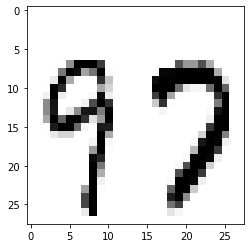

In [ ]:
i = 2
plt.imshow(nX_train[i].reshape(28, 28),cmap='Greys')
pred = model.predict(nX_train[i].reshape(-1, 28, 28, 1))
print("Prediction: ", pred.argmax())
label = int(nY_train[i])
print("Label: ", label)